<a href="https://colab.research.google.com/github/ThisGuy245/AI-Tasks/blob/main/AI_Task_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Assignment, Task A2

<ipython-input-27-8ab1e93d3b13>:69: UserWarning: Adding colorbar to a different Figure <Figure size 1000x600 with 21 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(scatter, ax=self.ax, ticks=[0, 1, 2, 3], label='Predicted Label')


<Figure size 640x480 with 0 Axes>

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4920 - loss: 0.1414 - val_accuracy: 0.4688 - val_loss: 0.1473
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4924 - loss: 0.1392  
Test Accuracy: 0.4900
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        52
           2       0.76      1.00      0.86        38
           3       0.40      1.00      0.57        60

    accuracy                           0.49       200
   macro avg       0.29      0.50      0.36       200
weighted avg       0.26      0.49      0.34       200

Confusion Matrix:
 [[ 0  0 12 38]
 [ 0  0  0 52]
 [ 0  0 38  0]
 [ 0  0  0 60]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


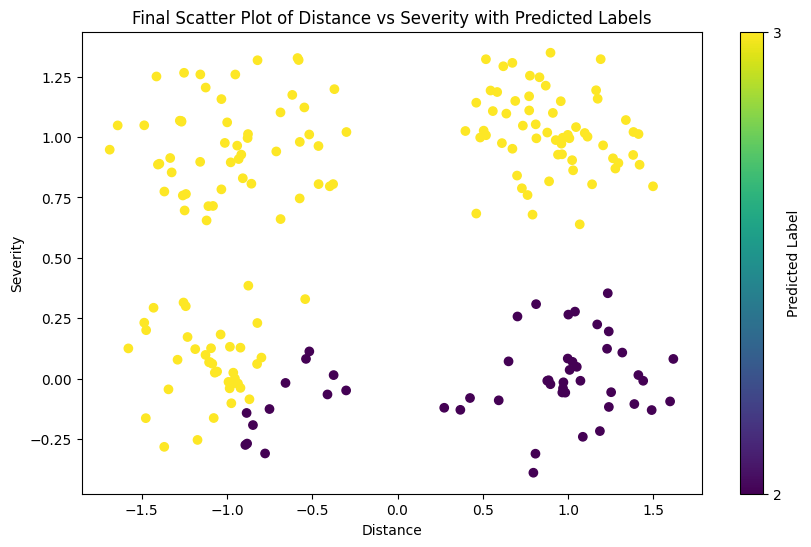

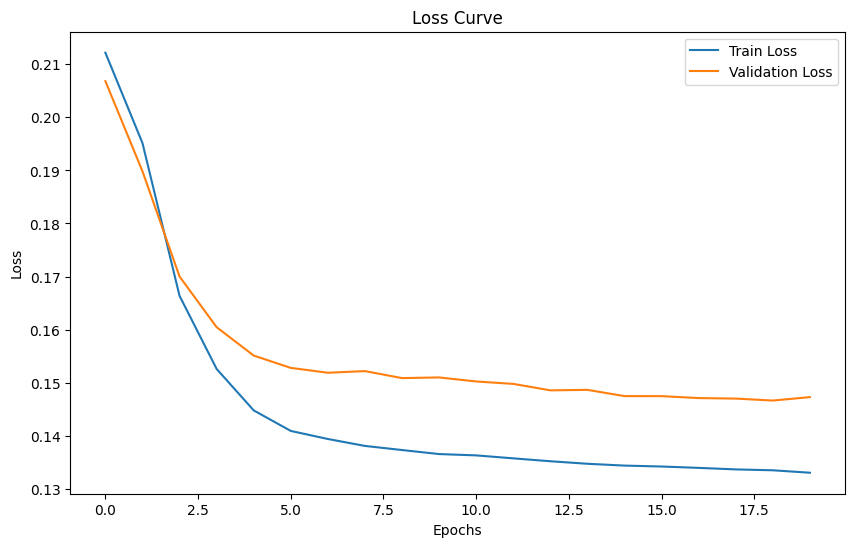

In [27]:
!pip install --upgrade tensorflow


import tensorflow as tf
print (tf.__version__)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# LOAD AND READ THE DATA
data = pd.read_csv('AIGPAssignmentTestData.csv', header=None)
data.columns = ['Distance', 'Severity', 'Action_Label_0', 'Action_Label_1', 'Action_Label_2', 'Action_Label_3']

# INPUT DATA AND TARGET DATA/ACTION DATA
X = data[['Distance', 'Severity']].values
y = data[['Action_Label_0', 'Action_Label_1', 'Action_Label_2', 'Action_Label_3']].values


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ACTUALLY MAKING THE MODEL AND GIVING IT HYPER PARAMETERS
def create_model(hidden_layers=2, neurons_per_layer=32, activation='relu', dropout_rate=0.5, learning_rate=0.001):
    model = Sequential()
    # Input layer
    model.add(Dense(neurons_per_layer, input_dim=2, activation=activation, kernel_regularizer=l2(0.01)))
    # Hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons_per_layer, activation=activation, kernel_regularizer=l2(0.01)))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    # Output layer
    model.add(Dense(4, activation='relu'))
    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model with increased dropout rate and L2 regularization to prevent overfitting
model = create_model(hidden_layers=1, neurons_per_layer=2, activation='relu', dropout_rate=0.5, learning_rate=0.01)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_true_classes, y_pred_classes))

# Create a scatter plot
y_labels = np.argmax(y, axis=1)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_labels, cmap='viridis')
plt.colorbar(scatter, ticks=[0, 1, 2, 3], label='Action Label')
plt.xlabel('Distance')
plt.ylabel('Severity')
plt.title('Scatter Plot of Distance vs Severity with Action Labels')
plt.show()

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()